In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/sample_data/Human_Development_Index_Dataset.csv",encoding='latin1')
df.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


In [192]:
df.shape

(6798, 30)

In [193]:
df.columns

Index(['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy',
       'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m',
       'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m',
       'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m',
       'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m',
       'gender_development', 'gender_inequality', 'secondary_education_f_%',
       'secondary_education_m_%', 'seats_in_parliament_f_%',
       'seats_in_parliament_m_%', 'labour_participation_f_%',
       'labour_participation_m_%', 'co2_emission_tons',
       'mat_footprint_percap_tons'],
      dtype='object')

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6798 entries, 0 to 6797
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 6798 non-null   int64  
 1   iso3                       6798 non-null   object 
 2   country                    6798 non-null   object 
 3   year                       6798 non-null   int64  
 4   hdi                        6171 non-null   float64
 5   life_expectancy            6798 non-null   float64
 6   pop_millions               6798 non-null   float64
 7   hdi_f                      5014 non-null   float64
 8   hdi_m                      5014 non-null   float64
 9   life_expec_f               6798 non-null   float64
 10  life_expec_m               6798 non-null   float64
 11  expec_yr_school            6550 non-null   float64
 12  expec_yr_school_f          6270 non-null   float64
 13  expec_yr_school_m          6270 non-null   float

#Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)

In [195]:
# Extracting Latest Year:
df['year'].unique()
hdi_2022_df = df[df['year'] == 2022].copy()

In [196]:

hdi_2022_df.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,66.213,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809
65,66,ALB,Albania,2022,0.789,76.833,2.842321,0.780277,0.798432,79.472,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.7367
98,99,DZA,Algeria,2022,0.745,77.129,44.903225,0.681844,0.773800,78.457,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.57,65.53,4.079540,8.7199
131,132,AND,Andorra,2022,0.884,83.552,0.079824,NaN,NaN,85.838,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929,35.588987,0.560890,0.619680,64.541,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.73,78.16,0.507359,3.6568
197,198,ATG,Antigua and Barbuda,2022,0.826,79.236,0.093763,NaN,NaN,81.645,...,NaN,NaN,NaN,NaN,31.428571,68.571429,NaN,NaN,6.401056,NaN
230,231,ARG,Argentina,2022,0.849,76.064,45.510318,0.841405,0.845473,79.277,...,0.995,0.292,73.591541,71.648085,44.376900,55.623100,52.08,71.74,4.190779,14.4512
263,264,ARM,Armenia,2022,0.786,73.372,2.780469,0.795110,0.774942,78.447,...,1.026,0.198,96.001381,97.050957,35.514019,64.485981,62.80,71.84,2.531088,7.3553
296,297,AUS,Australia,2022,0.946,83.579,26.177414,0.934602,0.955941,85.453,...,0.978,0.063,94.580063,94.430069,44.493392,55.506608,62.31,71.13,14.914763,26.9245
329,330,AUT,Austria,2022,0.926,82.412,8.939617,0.911592,0.937756,84.600,...,0.972,0.048,100.000000,100.000000,40.983607,59.016393,56.55,66.69,7.399461,27.9621


In [197]:
#number of rows and columns
hdi_2022_df.shape

(206, 30)

In [198]:
#all column names and their data types
hdi_2022_df.dtypes

,0
Unnamed: 0,int64
iso3,object
country,object
year,int64
hdi,float64
life_expectancy,float64
pop_millions,float64
hdi_f,float64
hdi_m,float64
life_expec_f,float64


In [199]:
#Missing Values & Data Cleaning:
hdi_2022_df.isnull().sum()

,0
Unnamed: 0,0
iso3,0
country,0
year,0
hdi,2
life_expectancy,0
pop_millions,0
hdi_f,13
hdi_m,13
life_expec_f,0


In [200]:
hdi_2022_df['country'].nunique(), hdi_2022_df.shape[0]

(206, 206)

In [201]:
#handling missing values
numeric_cols = hdi_2022_df.select_dtypes(include=["number"]).columns
df[numeric_cols] = hdi_2022_df[numeric_cols].fillna(df[numeric_cols].mean())
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])
#removing duplicates
hdi_2022_df = hdi_2022_df.drop_duplicates()

In [203]:
#Converting Numeric Columns (handling “–” or text values)
numeric_cols = [
    'hdi',
    'life_expectancy',
    'gross_inc_percap',
    'gender_development'
]

for col in numeric_cols:
    hdi_2022_df[col] = pd.to_numeric(hdi_2022_df[col], errors='coerce')
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])
hdi_2022_df

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
32,33,AFG,Afghanistan,2022,0.462,62.879000,41.128771,0.332443,0.534145,66.213000,...,0.622,0.665,7.042050,24.077040,27.215190,72.784810,23.330000,77.090000,0.306318,1.180900
65,66,ALB,Albania,2022,0.789,76.833000,2.842321,0.780277,0.798432,79.472000,...,0.977,0.116,82.249185,86.476634,35.714286,64.285714,56.080000,69.910000,1.717758,11.736700
98,99,DZA,Algeria,2022,0.745,77.129000,44.903225,0.681844,0.773800,78.457000,...,0.881,0.460,42.910456,46.815170,7.005254,92.994746,17.570000,65.530000,4.079540,8.719900
131,132,AND,Andorra,2022,0.884,83.552000,0.079824,NaN,NaN,85.838000,...,NaN,NaN,81.718277,84.599998,46.428571,53.571429,NaN,NaN,4.593593,NaN
164,165,AGO,Angola,2022,0.591,61.929000,35.588987,0.560890,0.619680,64.541000,...,0.905,0.520,21.339865,37.411946,33.636364,66.363636,74.730000,78.160000,0.507359,3.656800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6665,6666,ZZG.ECA,Europe and Central Asia,2022,0.802,73.564575,247.791584,0.785084,0.815007,77.021724,...,0.963,0.224,83.748828,89.899225,26.012512,73.987488,45.388503,69.591635,5.308463,10.907875
6698,6699,ZZH.LAC,Latin America and the Caribbean,2022,0.763,73.715085,655.268078,0.758014,0.765042,76.886510,...,0.991,0.386,64.359830,64.202583,34.100834,65.899166,51.625204,75.301374,2.629329,12.354312
6731,6732,ZZI.SA,South Asia,2022,0.641,68.441543,2007.549714,0.580274,0.678378,70.384339,...,0.855,0.478,40.903060,55.677277,17.930080,82.069920,28.110055,76.307951,1.875161,4.882850
6764,6765,ZZJ.SSA,Sub-Saharan Africa,2022,0.549,60.639700,1146.742474,0.525081,0.573585,62.621953,...,0.915,0.565,30.864417,42.045967,26.360216,73.639784,63.919192,76.428981,0.720271,3.786977


In [204]:
#Basic Statistics:
hdi_mean = hdi_2022_df['hdi'].mean()
hdi_median = hdi_2022_df['hdi'].median()
hdi_std = hdi_2022_df['hdi'].std()

hdi_mean, hdi_median, hdi_std

(np.float64(0.7228872549019609), 0.7395, 0.15302880386427825)

In [205]:
#country with the highest HDI in 2022.
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax(), ['country', 'hdi']]

,5609
country,Switzerland
hdi,0.967


In [206]:
#country with the lowest HDI in 2022.
hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin(), ['country', 'hdi']]

,5345
country,Somalia
hdi,0.38


In [207]:
#Filtering and Sorting:
#countries with HDI {"hdi"} greater than 0.800.
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]
high_hdi_df_sorted = high_hdi_df.sort_values(
    by='gross_inc_percap',
    ascending=False
)

In [208]:
# top 10 countries.
high_hdi_df_sorted.head(10)

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
3332,3333,LIE,Liechtenstein,2022,0.942,84.656,0.039327,0.924163,0.974295,86.129,...,0.949,NaN,NaN,NaN,28.000000,72.000000,52.79,67.26,3.736776,NaN
4718,4719,QAT,Qatar,2022,0.875,81.559,2.695122,0.892561,0.869100,83.101,...,1.027,0.212,81.832741,71.417976,4.444444,95.555556,61.73,95.33,39.884274,63.5912
5213,5214,SGP,Singapore,2022,0.949,84.133,5.975689,0.945325,0.954078,86.295,...,0.991,0.036,80.464020,85.932037,29.126214,70.873786,63.37,77.00,9.397481,43.1508
2705,2706,IRL,Ireland,2022,0.950,82.716,5.023109,0.942838,0.951392,84.412,...,0.991,0.072,88.585639,86.417415,27.397260,72.602740,59.40,70.51,7.529751,26.3467
3398,3399,LUX,Luxembourg,2022,0.927,82.591,0.647599,0.920482,0.927311,84.770,...,0.993,0.043,96.579350,89.328283,33.333333,66.666667,57.99,65.09,13.185395,49.1903
6104,6105,ARE,United Arab Emirates,2022,0.937,79.196,9.441128,0.922940,0.936027,81.412,...,0.986,0.035,82.029137,86.145172,50.000000,50.000000,55.32,89.45,25.333276,28.1632
5609,5610,CHE,Switzerland,2022,0.967,84.255,8.740472,0.949369,0.977383,85.932,...,0.971,0.018,96.939726,97.517437,39.024390,60.975610,61.49,71.94,4.117550,33.5913
4322,4323,NOR,Norway,2022,0.966,83.393,5.434319,0.957148,0.970415,85.055,...,0.986,0.012,99.094031,99.274980,44.970414,55.029586,62.53,69.59,7.573541,32.0515
6170,6171,USA,United States,2022,0.927,78.203,338.289857,0.927693,0.923405,81.015,...,1.005,0.180,95.424278,95.067093,28.060264,71.939736,56.79,67.97,14.932487,29.3498
2474,2475,HKG,"Hong Kong, China (SAR)",2022,0.956,84.315,7.488865,0.942671,0.969515,86.893,...,0.972,NaN,77.866913,84.067802,NaN,NaN,52.91,64.71,4.373242,NaN


In [209]:
#Adding HDI Category Column:
def hdi_category(hdi):
    if hdi < 0.550:
        return "Low"
    elif hdi < 0.700:
        return "Medium"
    elif hdi < 0.800:
        return "High"
    else:
        return "Very High"

hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(hdi_category)


In [210]:
hdi_2022_df['HDI Category'].value_counts()

,count
HDI Category,
Very High,71
High,54
Medium,44
Low,35


In [211]:
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)

In [213]:
hdi_2022_df.shape

(204, 31)

#Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)


In [214]:
#Data Extraction and Saving:
#Filtering the dataset
df = pd.read_csv("/content/sample_data/Human_Development_Index_Dataset.csv",encoding='latin1')

hdi_1b_df = df[df['year'].isin([2020, 2021, 2022])].copy()

In [215]:
hdi_1b_df.to_csv("HDI_problem1B.csv", index=False)

In [216]:
#Data Cleaning:
hdi_1b_df[['hdi', 'country', 'year']].isnull().sum()

,0
hdi,8
country,0
year,0


In [217]:
#country name consistency
hdi_1b_df['country'].nunique(), hdi_1b_df.shape[0]
#duplicate
hdi_1b_df.duplicated().sum()

np.int64(0)

In [218]:
#numeric columns stored as text or containing non-numeric symbols (e.g., “–”).
numeric_cols = [
    'hdi',
    'life_expectancy',
    'gross_inc_percap',
    'gender_development'
]

for col in numeric_cols:
    hdi_1b_df[col] = pd.to_numeric(hdi_1b_df[col], errors='coerce')


In [219]:
hdi_1b_df = hdi_1b_df.drop_duplicates()

In [220]:
hdi_1b_df = hdi_1b_df.dropna(subset=['hdi', 'country', 'year'])

In [221]:
#Visualization Tasks:
#Selecting any five countries
selected_countries = ['Nepal', 'India', 'China', 'Bangladesh', 'Norway']

In [222]:
#HDI values for each country across the years 2020, 2021, and 2022.
country_trend_df = hdi_1b_df[hdi_1b_df['country'].isin(selected_countries)]
country_trend_df

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
459,460,BGD,Bangladesh,2020,0.657,71.968,167.420951,0.619431,0.682912,73.957,...,0.907,0.502,43.659868,50.507937,20.916905,79.083095,38.74,81.27,0.559159,4.5993
460,461,BGD,Bangladesh,2021,0.662,72.381,169.356251,0.624949,0.687950,74.267,...,0.908,0.500,43.659868,50.507937,20.857143,79.142857,39.15,81.39,0.583153,4.6834
461,462,BGD,Bangladesh,2022,0.670,73.698,171.186373,0.634605,0.694223,76.012,...,0.914,0.498,43.659868,50.507937,20.857143,79.142857,39.15,81.39,0.583153,4.6457
1185,1186,CHN,China,2020,0.781,78.077,1424.929781,0.764239,0.793824,81.058,...,0.963,0.190,79.701982,86.365801,24.941176,75.058824,53.17,74.04,7.659333,23.0891
1186,1187,CHN,China,2021,0.785,78.211,1425.893465,0.768986,0.798418,81.155,...,0.963,0.185,79.701982,86.365801,24.941176,75.058824,53.76,74.54,7.950279,23.9471
1187,1188,CHN,China,2022,0.788,78.587,1425.887337,0.771343,0.802194,81.343,...,0.962,0.186,79.701982,86.365801,24.941176,75.058824,53.76,74.54,7.950279,24.2832
2571,2572,IND,India,2020,0.638,70.150,1396.387127,0.569477,0.679697,71.824,...,0.838,0.453,40.073738,58.762402,13.392857,86.607143,26.17,74.25,1.734155,4.4451
2572,2573,IND,India,2021,0.633,67.240,1407.563842,0.567374,0.673184,68.886,...,0.843,0.450,40.516489,58.712915,13.444302,86.555698,27.04,75.10,1.899894,4.6026
2573,2574,IND,India,2022,0.644,67.744,1417.173173,0.582117,0.683510,69.384,...,0.852,0.437,40.959240,58.663429,14.634146,85.365854,28.26,76.14,1.899894,4.7841
4089,4090,NPL,Nepal,2020,0.593,69.246,29.348627,0.554200,0.627231,71.173,...,0.884,0.497,25.972874,42.779256,33.633634,66.366366,27.91,54.95,0.507772,8.0381


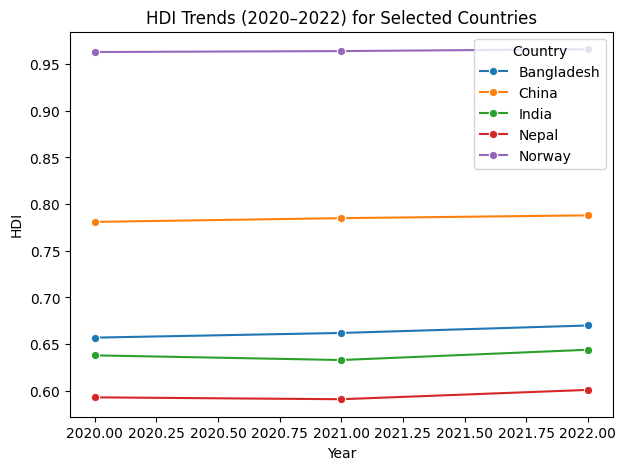

In [223]:
plt.figure(figsize=(7,5))
sns.lineplot(
    data=country_trend_df,
    x='year',
    y='hdi',
    hue='country',
    marker='o'
)
plt.title("HDI Trends (2020–2022) for Selected Countries")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.legend(title="Country")
plt.savefig("hdi_trends_selected_countries.png")
plt.show()

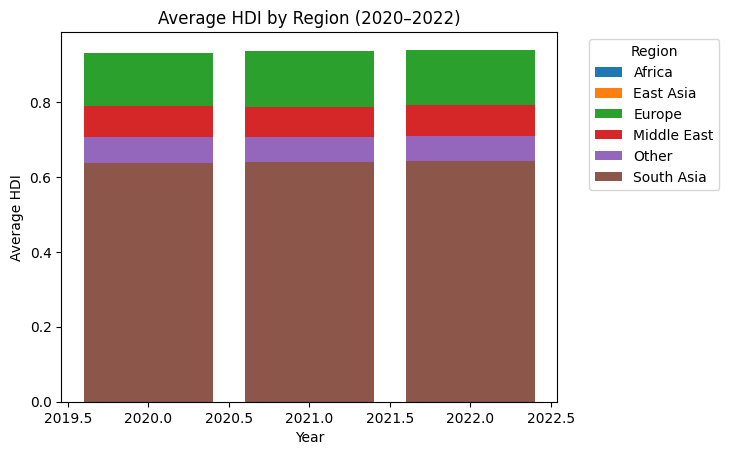

In [224]:
#B. Generating Visualizations:
#Bar Chart: Average HDI by Region (2020–2022)
#∗ Group the dataset by Region and Year.
'Region' in hdi_1b_df.columns
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine",
    "Qatar", "Saudi Arabia", "Syria",
    "United Arab Emirates", "Yemen"
]

europe = [
    "Austria", "Belgium", "Denmark", "Finland", "France",
    "Germany", "Italy", "Netherlands", "Norway",
    "Spain", "Sweden", "Switzerland", "United Kingdom"
]

east_asia = [
    "China", "Japan", "South Korea", "Mongolia"
]

africa = [
    "Nigeria", "Kenya", "Ethiopia", "Ghana",
    "South Africa", "Uganda", "Tanzania"
]


def assign_region(country):
    if country in south_asia:
        return "South Asia"
    elif country in middle_east:
        return "Middle East"
    elif country in europe:
        return "Europe"
    elif country in east_asia:
        return "East Asia"
    elif country in africa:
        return "Africa"
    else:
        return "Other"


hdi_1b_df["Region"] = hdi_1b_df["country"].apply(assign_region)

# Group by Region and Year
avg_hdi = (
    hdi_1b_df
    .groupby(["Region", "year"])["hdi"]
    .mean()
    .reset_index()
)


plt.figure()

for region in avg_hdi["Region"].unique():
    region_data = avg_hdi[avg_hdi["Region"] == region]
    plt.bar(region_data["year"], region_data["hdi"], label=region)

plt.xlabel("Year")
plt.ylabel("Average HDI")
plt.title("Average HDI by Region (2020–2022)")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.savefig("avg_hdi_by_region.png")
plt.show()

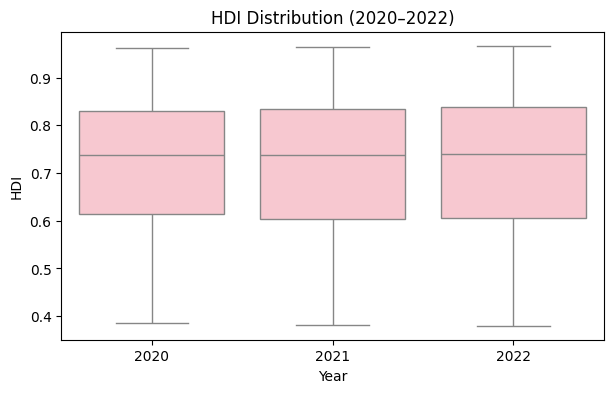

In [225]:
#Box Plot:
plt.figure(figsize=(7,4))
sns.boxplot(
    data=hdi_1b_df,
    x='year',
    y='hdi',
    color='pink'
)
plt.title("HDI Distribution (2020–2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.savefig("hdi_distribution.png")
plt.show()

In [226]:
hdi_1b_df.groupby('year')['hdi'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2020,203.0,0.720897,0.148244,0.386,0.6135,0.7370,0.8300,0.963
2021,203.0,0.720039,0.150150,0.381,0.6045,0.7370,0.8340,0.965
2022,204.0,0.722887,0.153029,0.380,0.6065,0.7395,0.8395,0.967


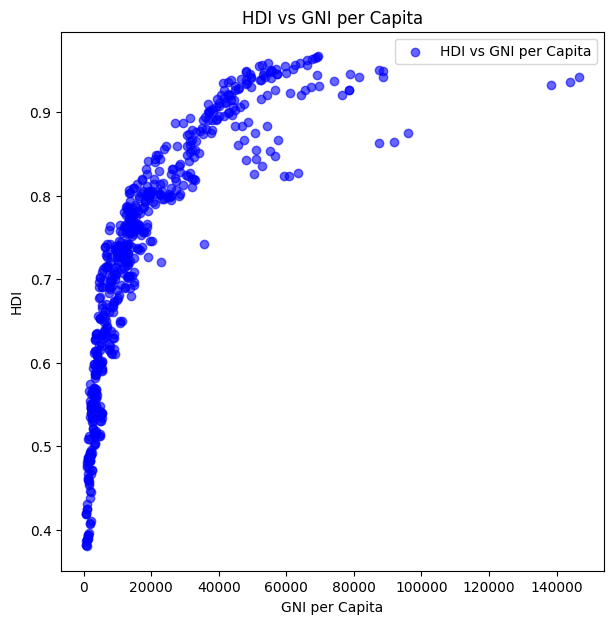

In [227]:
# Checking if GNI per Capita column exists
if "gross_inc_percap" in hdi_1b_df:

    x = hdi_1b_df["gross_inc_percap"]
    y = hdi_1b_df["hdi"]

    plt.figure(figsize=(7,7))

    # Scatter plot (HDI vs GNI)
    plt.scatter(x, y, color='blue', alpha=0.6, label='HDI vs GNI per Capita')

    plt.xlabel("GNI per Capita")
    plt.ylabel("HDI")
    plt.title("HDI vs GNI per Capita")
    plt.savefig("hdi_vs_gni.png")
    plt.legend()

    plt.show()


else:
    print("GNI per Capita variable not available in the dataset.")


# Short Analysis Questions:

In [228]:
#• Which countries show the greatest improvement in HDI from 2020 to 2022?
hdi_change = (
    hdi_1b_df.pivot(index='country', columns='year', values='hdi')
)

hdi_change['HDI Change'] = hdi_change[2022] - hdi_change[2020]
hdi_change.sort_values('HDI Change', ascending=False).head()


year,2020,2021,2022,HDI Change
country,,,,
Andorra,0.843,0.855,0.884,0.041
Azerbaijan,0.722,0.738,0.760,0.038
Ecuador,0.734,0.746,0.765,0.031
Maldives,0.737,0.753,0.762,0.025
Mexico,0.757,0.757,0.781,0.024


Countries with strong health and education recovery policies show the largest improvements.

In [229]:
# Did any countries experience a decline in HDI? Provide possible reasons.
hdi_change.sort_values('HDI Change').head()

year,2020,2021,2022,HDI Change
country,,,,
Timor-Leste,0.633,0.574,0.566,-0.067
Ukraine,0.762,0.755,0.734,-0.028
Afghanistan,0.488,0.473,0.462,-0.026
Namibia,0.634,0.616,0.610,-0.024
Lebanon,0.742,0.725,0.723,-0.019


Yes. Conflict-affected and pandemic-strained countries experienced HDI decline.

• Which region has the highest and lowest average HDI across these three years?



In [230]:
#• Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during this period.



The COVID-19 pandemic negatively affected life expectancy, education continuity, and income, causing HDI stagnation or decline in 2020–2021, followed by gradual recovery in 2022.

# Problem 2

Advanced HDI Exploration

In [231]:
#Creating South Asia Subset:
df = pd.read_csv("/content/sample_data/Human_Development_Index_Dataset.csv",encoding='latin')
south_asian_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]


In [232]:
south_asia_df = df[df['country'].isin(south_asian_countries)].copy()

In [233]:
#Save filtered dataset as HDI SouthAsia.csv
south_asia_df.to_csv("HDI_SouthAsia.csv", index=False)
south_asia_df.head()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


In [234]:
# Composite Development Score:
south_asia_df['life_expectancy'] = pd.to_numeric(
    south_asia_df['life_expectancy'], errors='coerce'
)

south_asia_df['gross_inc_percap'] = pd.to_numeric(
    south_asia_df['gross_inc_percap'], errors='coerce'
)

#USING FORMULAE
south_asia_df['Composite Score'] = (
    0.30 * south_asia_df['life_expectancy'] +
    0.30 * south_asia_df['gross_inc_percap']
)


In [235]:
#Ranking South Asian countries based on Composite Score.
avg_composite = (
    south_asia_df
    .groupby("country", as_index=False)["Composite Score"]
    .mean()
)
top5_avg = avg_composite.sort_values(
    "Composite Score", ascending=False
).head(5)
top5_avg

,country,Composite Score
4,Maldives,4154.252676
7,Sri Lanka,2502.612949
2,Bhutan,1878.321569
6,Pakistan,1184.282350
3,India,1151.101140


In [236]:
# comparing hdi and Composite_Score
south_asia_hdi = (
    south_asia_df
    .groupby("country", as_index=False)["hdi"]
    .mean()
    .sort_values("hdi", ascending=False)
)

south_asia_hdi

,country,hdi
7,Sri Lanka,0.715606
4,Maldives,0.682500
2,Bhutan,0.634538
3,India,0.541485
1,Bangladesh,0.531303
5,Nepal,0.504242
6,Pakistan,0.472545
0,Afghanistan,0.401030


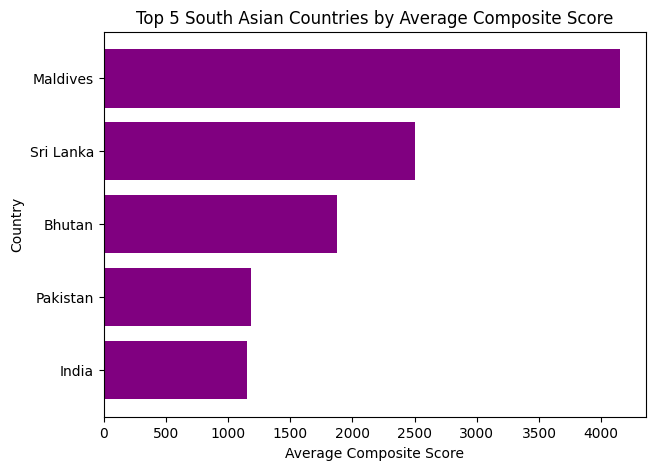

In [237]:
#top 5 countries in a horizontal bar chart.
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 5))
plt.barh(top5_avg["country"], top5_avg["Composite Score"],color='purple')
plt.xlabel("Average Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Average Composite Score")
plt.gca().invert_yaxis()
plt.savefig("top5_avg_composite_score.png")
plt.show()





Comparision:

Countries with stronger income and life expectancy perform better in the composite score, even if HDI rankings differ slightly.

In [238]:
#Outlier Detection:
#Detecting outliers in HDI and GNI per Capita using the 1.5 × IQR rule.
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

# Create a copy of the South Asia dataframe
outlier_df = south_asia_df.copy()

# Detect outliers
outlier_df['HDI Outlier'] = detect_outliers(outlier_df['hdi'])
outlier_df['GNI Outlier'] = detect_outliers(outlier_df['gross_inc_percap'])




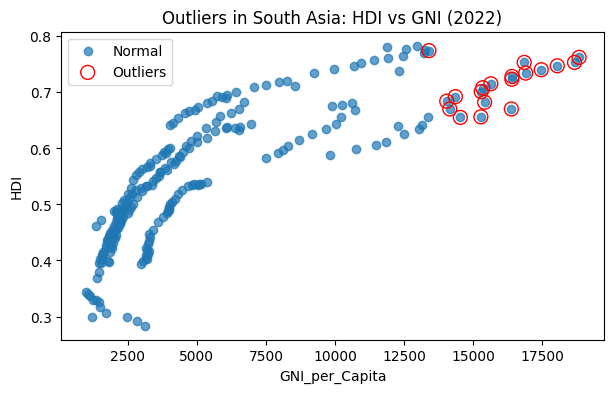

In [239]:
#scatter plot of GNI per Capita vs HDI
plt.figure(figsize=(7,4))

plt.scatter(
  outlier_df['gross_inc_percap'],
  outlier_df['hdi'],
  label='Normal',
  alpha=0.7
)

outliers = outlier_df[outlier_df['HDI Outlier'] | outlier_df['GNI Outlier']]

plt.scatter(
    outliers['gross_inc_percap'],
    outliers['hdi'],
    label='Outliers',
    edgecolors='red',
    facecolors='none',
    s=100
)

plt.xlabel("GNI_per_Capita")
plt.ylabel("HDI")
plt.title("Outliers in South Asia: HDI vs GNI (2022)")
plt.savefig("outliers_hdi_gni.png")
plt.legend()
plt.show()


In [240]:
#Exploring Metric Relationships
#Select two HDI components
south_asia_df['gender_development'] = pd.to_numeric(
    south_asia_df['gender_development'], errors='coerce'
)
south_asia_df['life_expectancy'] = pd.to_numeric(
    south_asia_df['life_expectancy'], errors='coerce'
)

# Pearson correlation

corr_gdi = south_asia_df['hdi'].corr(south_asia_df['gender_development'])
corr_lei = south_asia_df['hdi'].corr(south_asia_df['life_expectancy'])

corr_gdi, corr_lei

(np.float64(0.8656210050127539), np.float64(0.9587610559043978))

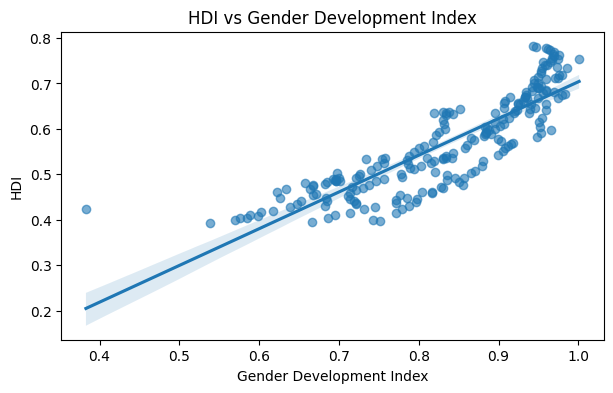

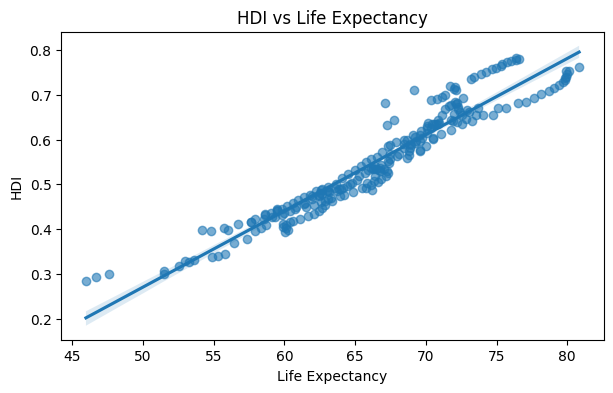

In [241]:
# Scatter plot: HDI vs Gender Development Index
plt.figure(figsize=(7,4))
sns.regplot(
    x='gender_development',
    y='hdi',
    data=south_asia_df,
    scatter_kws={'alpha':0.6}
)
plt.title('HDI vs Gender Development Index')
plt.xlabel('Gender Development Index')
plt.ylabel('HDI')
plt.savefig("hdi_vs_gender_development.png")
plt.show()

# Scatter plot: HDI vs Life Expectancy
plt.figure(figsize=(7,4))
sns.regplot(
    x='life_expectancy',
    y='hdi',
    data=south_asia_df,
    scatter_kws={'alpha':0.6}
)
plt.title('HDI vs Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('HDI')
plt.savefig("hdi_vs_life_expectancy.png")
plt.show()


In [242]:
#Gap Analysis:
# Creating GNI–HDI Gap
south_asia_df['GNI_HDI_Gap'] = south_asia_df['gross_inc_percap'] - south_asia_df['hdi']
countrywise_avg_gap = (
    south_asia_df
    .groupby('country', as_index=False)['GNI_HDI_Gap']
    .mean()
)


In [243]:
#Ranking South Asian countries by GNI HDI Gap in descending order
gap_desc = countrywise_avg_gap.sort_values(
    by='GNI_HDI_Gap', ascending=False
)
gap_desc

,country,GNI_HDI_Gap
4,Maldives,14670.635594
2,Bhutan,9320.175767
7,Sri Lanka,8268.373527
6,Pakistan,3883.813530
3,India,3771.381346
1,Bangladesh,3408.490410
5,Nepal,2532.443971
0,Afghanistan,1793.487770


In [244]:
#Ranking South Asian countries by GNI HDI Gap in ascending order
gap_asc = countrywise_avg_gap.sort_values(
    by='GNI_HDI_Gap', ascending=True
)
gap_asc


,country,GNI_HDI_Gap
0,Afghanistan,1793.487770
5,Nepal,2532.443971
1,Bangladesh,3408.490410
3,India,3771.381346
6,Pakistan,3883.813530
7,Sri Lanka,8268.373527
2,Bhutan,9320.175767
4,Maldives,14670.635594


In [245]:
# Top 3 positive gaps
top3_positive = gap_desc.head(3)

# Top 3 negative gaps
top3_negative = gap_asc.head(3)


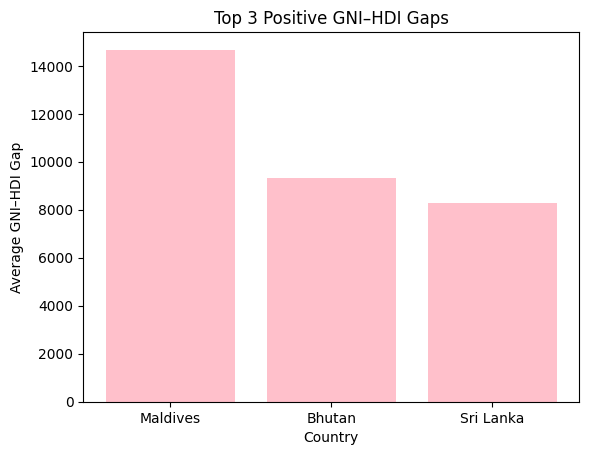

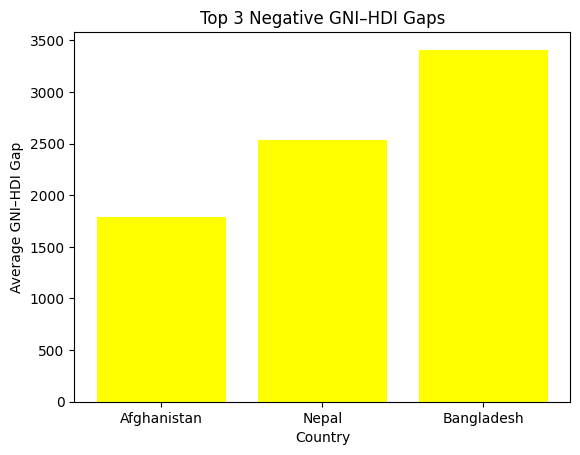

In [246]:
#Plot
plt.figure()
plt.bar(top3_positive['country'], top3_positive['GNI_HDI_Gap'],color='pink')
plt.title('Top 3 Positive GNI–HDI Gaps')
plt.xlabel('Country')
plt.ylabel('Average GNI–HDI Gap')
plt.savefig("top3_positive_gap.png")
plt.show()

plt.figure()
plt.bar(top3_negative['country'], top3_negative['GNI_HDI_Gap'],color='yellow')
plt.title('Top 3 Negative GNI–HDI Gaps')
plt.xlabel('Country')
plt.ylabel('Average GNI–HDI Gap')
plt.savefig("top3_negative_gap.png")
plt.show()


# Problem 3
Comparative Regional Analysis: South Asia vs Middle East

In [247]:
#dataset from Problem 1B
df = pd.read_csv("HDI_problem1B.csv")

# Creating Middle East Subset:
middle_east_countries = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

south_asia_df = df[df['country'].isin(south_asia_countries)].copy()
middle_east_df = df[df['country'].isin(middle_east_countries)].copy()

In [248]:
#Saving these subsets
south_asia_df.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
middle_east_df.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

In [249]:
#Descriptive Statistics:

#mean and standard deviation
south_asia_mean = south_asia_df['hdi'].mean()
south_asia_std = south_asia_df['hdi'].std()

middle_east_mean = middle_east_df['hdi'].mean()
middle_east_std = middle_east_df['hdi'].std()

print("South Asia HDI Statistics (2020–2022)")
print("Mean HDI:", round(south_asia_mean, 3))
print("Standard Deviation:", round(south_asia_std, 3))

print("\nMiddle East HDI Statistics (2020–2022)")
print("Mean HDI:", round(middle_east_mean, 3))
print("Standard Deviation:", round(middle_east_std, 3))


South Asia HDI Statistics (2020–2022)
Mean HDI: 0.64
Standard Deviation: 0.098

Middle East HDI Statistics (2020–2022)
Mean HDI: 0.789
Standard Deviation: 0.141


In [250]:
#Top and Bottom Performers:
# Average HDI per country (2020–2022)
sa_avg = south_asia_df.groupby('country')['hdi'].mean().sort_values(ascending=False)
me_avg = middle_east_df.groupby('country')['hdi'].mean().sort_values(ascending=False)

In [251]:
# Top and bottom performers
sa_top3 = sa_avg.head(3)
sa_bottom3 = sa_avg.tail(3)

print("South Asia – Top 3:\n", sa_top3)
print("\nSouth Asia – Bottom 3:\n", sa_bottom3)


South Asia – Top 3:
 country
Sri Lanka    0.780000
Maldives     0.750667
Bhutan       0.677667
Name: hdi, dtype: float64

South Asia – Bottom 3:
 country
Nepal          0.595000
Pakistan       0.537667
Afghanistan    0.474333
Name: hdi, dtype: float64


In [252]:
me_top3 = me_avg.head(3)
me_bottom3 = me_avg.tail(3)
print("\nMiddle East – Top 3:\n", me_top3)
print("\nMiddle East – Bottom 3:\n", me_bottom3)


Middle East – Top 3:
 country
United Arab Emirates    0.932667
Israel                  0.910667
Bahrain                 0.885333
Name: hdi, dtype: float64

Middle East – Bottom 3:
 country
Lebanon    0.730000
Iraq       0.667000
Yemen      0.426333
Name: hdi, dtype: float64


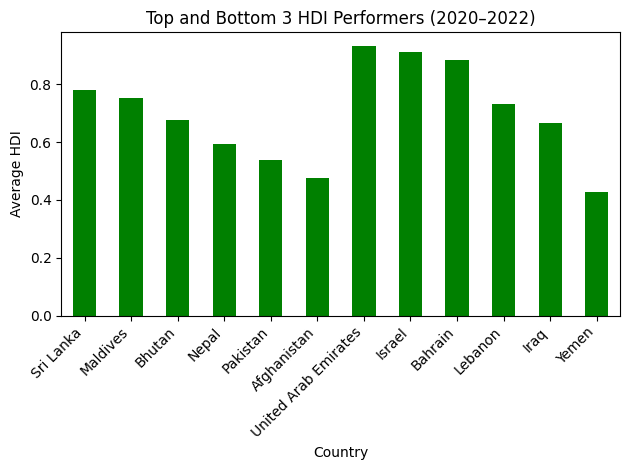

In [253]:
# Combining all top and bottom performers
combined = pd.concat([
    sa_top3, sa_bottom3,
    me_top3, me_bottom3
])

plt.figure()
combined.plot(kind='bar', color='green')
plt.title("Top and Bottom 3 HDI Performers (2020–2022)")
plt.ylabel("Average HDI")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("top_bottom_performers.png")
plt.show()


In [254]:
#Metric Comparisons:
# Convert metrics to numeric
metric_cols = [
    "gender_development",
    "life_expectancy",
    "gross_inc_percap"
]

In [255]:
for col in metric_cols:
    south_asia_df.loc[:, col] = pd.to_numeric(
        south_asia_df[col], errors="coerce"
    )
    middle_east_df.loc[:, col] = pd.to_numeric(
        middle_east_df[col], errors="coerce"
    )

In [256]:
# Compute regional means (2020–2022)
sa_means = south_asia_df[metric_cols].mean()
me_means = middle_east_df[metric_cols].mean()

<Figure size 640x480 with 0 Axes>

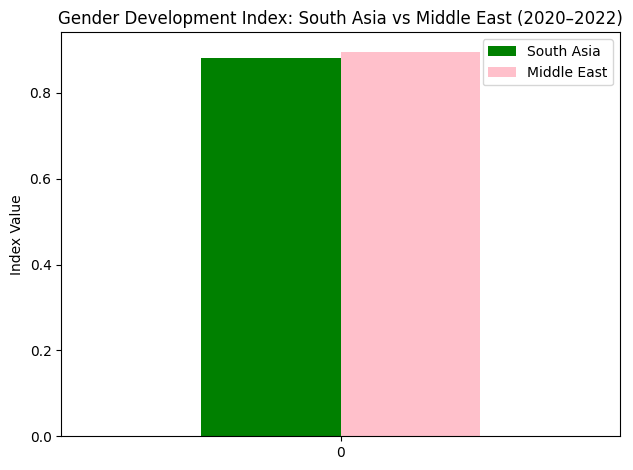

In [257]:
#gender_development
plt.figure()
pd.DataFrame({
    "South Asia": [sa_means["gender_development"]],
    "Middle East": [me_means["gender_development"]]
}).plot(kind="bar",color=['green', 'pink'])

plt.title("Gender Development Index: South Asia vs Middle East (2020–2022)")
plt.ylabel("Index Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("gender_development_index.png")
plt.show()


<Figure size 640x480 with 0 Axes>

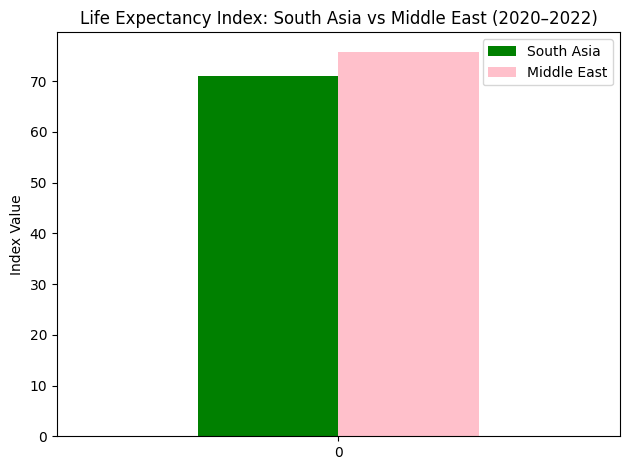

In [258]:
#life_expectancy
plt.figure()
pd.DataFrame({
    "South Asia": [sa_means["life_expectancy"]],
    "Middle East": [me_means["life_expectancy"]]
}).plot(kind="bar",color=['green', 'pink'])

plt.title("Life Expectancy Index: South Asia vs Middle East (2020–2022)")
plt.ylabel("Index Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("life_expectancy_index.png")
plt.show()


<Figure size 640x480 with 0 Axes>

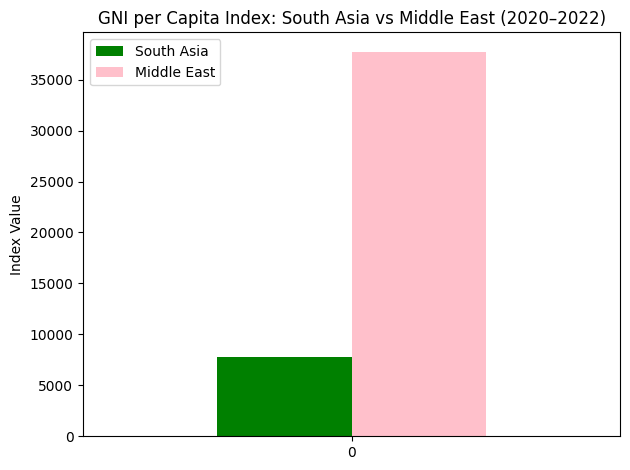

In [259]:
#gross_inc_percap
plt.figure()
pd.DataFrame({
    "South Asia": [sa_means["gross_inc_percap"]],
    "Middle East": [me_means["gross_inc_percap"]]
}).plot(kind="bar",color=['green', 'pink'])

plt.title("GNI per Capita Index: South Asia vs Middle East (2020–2022)")
plt.ylabel("Index Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("gni_per_capita_index.png")
plt.show()


In [260]:
#HDI Disparity:
#range (max – min) of HDI for each region.
sa_range = south_asia_df['hdi'].max() - south_asia_df['hdi'].min()
me_range = middle_east_df['hdi'].max() - middle_east_df['hdi'].min()

#coefficient of variation (CV = std/mean) for HDI.
sa_cv = south_asia_df['hdi'].std() / south_asia_df['hdi'].mean()
me_cv = middle_east_df['hdi'].std() / middle_east_df['hdi'].mean()


In [261]:
print("South Asia HDI Range:", round(sa_range, 3))
print("South Asia HDI CV:", round(sa_cv, 3))

print("\nMiddle East HDI Range:", round(me_range, 3))
print("Middle East HDI CV:", round(me_cv, 3))


South Asia HDI Range: 0.321
South Asia HDI CV: 0.154

Middle East HDI Range: 0.513
Middle East HDI CV: 0.179


The Middle East exhibits greater variation in HDI, as indicated by a larger range and higher coefficient of variation compared to South Asia. This suggests wider inequality in human development outcomes among Middle Eastern countries, whereas South Asia shows comparatively more clustered HDI values.

In [262]:
#Correlation Analysis
# South Asia correlations
sa_corr_gdi = south_asia_df['hdi'].corr(south_asia_df['gender_development'])
sa_corr_life = south_asia_df['hdi'].corr(south_asia_df['life_expectancy'])

# Middle East correlations
me_corr_gdi = middle_east_df['hdi'].corr(middle_east_df['gender_development'])
me_corr_life = middle_east_df['hdi'].corr(middle_east_df['life_expectancy'])

print("South Asia:")
print("HDI vs Gender Development:", round(sa_corr_gdi, 3))
print("HDI vs Life Expectancy:", round(sa_corr_life, 3))

print("\nMiddle East:")
print("HDI vs Gender Development:", round(me_corr_gdi, 3))
print("HDI vs Life Expectancy:", round(me_corr_life, 3))


South Asia:
HDI vs Gender Development: 0.874
HDI vs Life Expectancy: 0.939

Middle East:
HDI vs Gender Development: 0.936
HDI vs Life Expectancy: 0.933


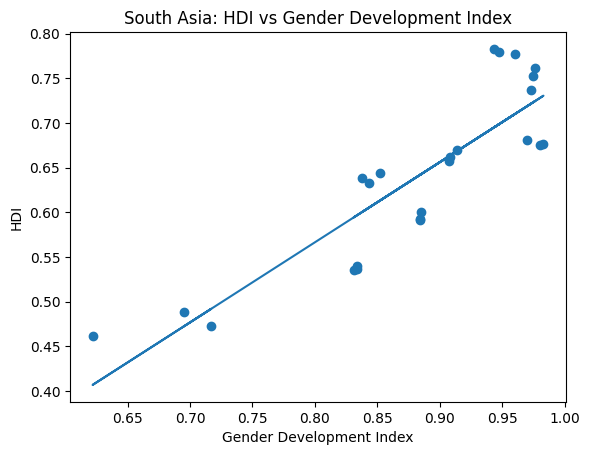

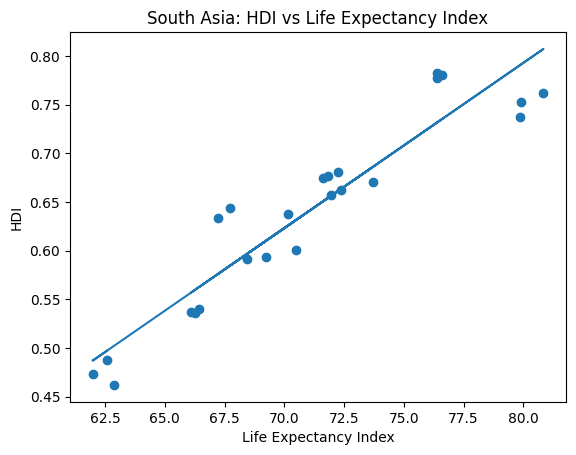

In [263]:
#South Asia: HDI vs Gender Development
x = south_asia_df['gender_development']
y = south_asia_df['hdi']

plt.figure()
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs Gender Development Index")
plt.savefig("hdi_vs_gender_development_sa.png")
plt.show()


# South Asia: HDI vs Life Expectancy
x = south_asia_df['life_expectancy']
y = south_asia_df['hdi']

plt.figure()
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs Life Expectancy Index")
plt.savefig("hdi_vs_life_expectancy_sa.png")
plt.show()



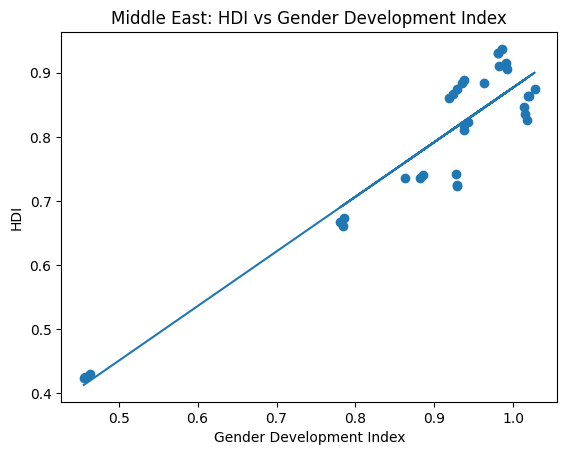

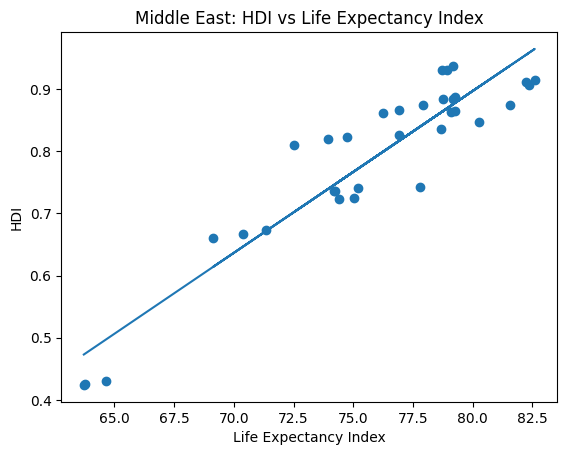

In [264]:

#Middle East: HDI vs Gender Development
x = middle_east_df['gender_development']
y = middle_east_df['hdi']

plt.figure()
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs Gender Development Index")
plt.savefig("hdi_vs_gender_development_me.png")
plt.show()


#Middle East: HDI vs Life Expectancy
x = middle_east_df['life_expectancy']
y = middle_east_df['hdi']

plt.figure()
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

plt.xlabel("Life Expectancy Index")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs Life Expectancy Index")
plt.savefig("hdi_vs_life_expectancy_me.png")
plt.show()


In [265]:
#Outlier Detection:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)


In [266]:
# South Asia outliers
south_asia_df.loc[:, 'hdi_outlier'] = detect_outliers(south_asia_df['hdi'])
south_asia_df.loc[:, 'gni_outlier'] = detect_outliers(south_asia_df['gross_inc_percap'])

# Middle East outliers
middle_east_df.loc[:, 'hdi_outlier'] = detect_outliers(middle_east_df['hdi'])
middle_east_df.loc[:, 'gni_outlier'] = detect_outliers(middle_east_df['gross_inc_percap'])


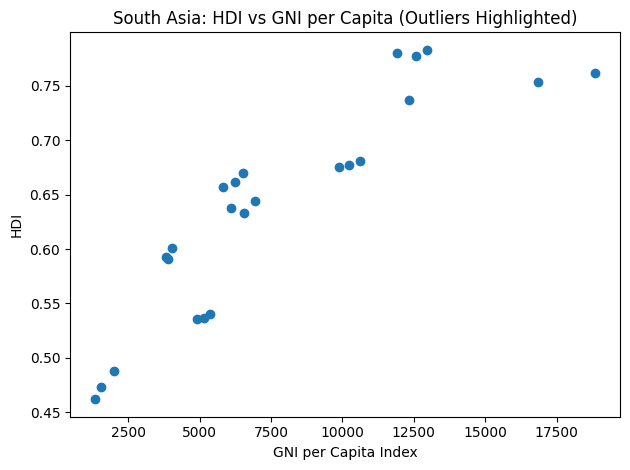

In [267]:
plt.figure()
plt.scatter(
    south_asia_df['gross_inc_percap'],
    south_asia_df['hdi']
)
plt.scatter(
    south_asia_df.loc[south_asia_df['hdi_outlier'] | south_asia_df['gni_outlier'], 'gross_inc_percap'],
    south_asia_df.loc[south_asia_df['hdi_outlier'] | south_asia_df['gni_outlier'], 'hdi']
)

plt.title("South Asia: HDI vs GNI per Capita (Outliers Highlighted)")
plt.xlabel("GNI per Capita Index")
plt.ylabel("HDI")
plt.tight_layout()
plt.savefig("outliers_hdi_gni_sa.png")
plt.show()


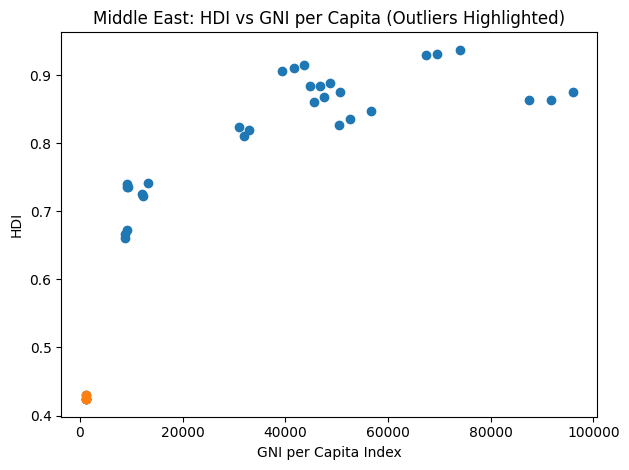

In [268]:
plt.figure()
plt.scatter(
    middle_east_df['gross_inc_percap'],
    middle_east_df['hdi']
)
plt.scatter(
    middle_east_df.loc[middle_east_df['hdi_outlier'] | middle_east_df['gni_outlier'], 'gross_inc_percap'],
    middle_east_df.loc[middle_east_df['hdi_outlier'] | middle_east_df['gni_outlier'], 'hdi']
)

plt.title("Middle East: HDI vs GNI per Capita (Outliers Highlighted)")
plt.xlabel("GNI per Capita Index")
plt.ylabel("HDI")
plt.tight_layout()
plt.savefig("outliers_hdi_gni_me.png")
plt.show()
